In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import extra trees
from sklearn.ensemble import ExtraTreesRegressor


In [30]:
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor

In [31]:
# Load the data
india_train = pd.read_csv("India_train.csv")
india_test = pd.read_csv("India_test.csv")
usa_train = pd.read_csv("USA_train.csv")
usa_test = pd.read_csv("USA_test.csv")
soil_rainfall = pd.read_csv("India_soil_rainfall_30years.csv")
commodity = pd.read_csv("USA_Commodity_prices.csv")
submission = pd.read_csv("submission.csv")

In [32]:
india_train

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,23.32,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,18.24,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,19.69,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,NaN,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,28.12,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,2006,West Bengal,Jalpaiguri,0.0,0.0,0,0.00,8.68,48.92,284.72,...,33.77,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70
4701,2006,West Bengal,Darjeeling,0.0,0.0,0,0.00,9.32,67.40,288.60,...,24.83,64.10,48.93,6477.0,NaN,48.47,34.63,42436.0,301.08,224.49
4702,2006,West Bengal,Malda,NaN,0.0,0,0.00,4.68,16.49,48.28,...,25.88,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29
4703,2006,West Bengal,Cooch Behar,0.0,0.0,0,0.00,7.62,31.35,248.95,...,28.63,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27


In [33]:
india_train.shape

(4705, 103)

In [34]:
india_test.shape

(2476, 103)

In [35]:
india_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Columns: 103 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(99), int64(2), object(2)
memory usage: 3.7+ MB


In [36]:
india_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Columns: 103 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(99), int64(2), object(2)
memory usage: 1.9+ MB


In [37]:
india_train.describe()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
count,4705.000000,4438.000000,4477.000000,4705.000000,4489.000000,4458.000000,4445.000000,4485.000000,4491.000000,4471.000000,...,4486.000000,4470.000000,4471.000000,4481.000000,4479.000000,4449.000000,4467.000000,4440.000000,4443.000000,4474.000000
mean,1998.025292,655.725327,501.854367,1929.775133,18.153555,16.186774,21.222115,27.203142,52.273295,155.832713,...,27.947414,30.861284,22.573136,4415.581790,11.750246,13.755383,10.851428,49886.029955,122.181330,85.892845
std,4.893509,2294.044035,1623.216667,4919.725762,25.831879,27.118176,28.666592,47.434857,91.043304,193.457432,...,9.687258,24.060465,15.257428,6241.924452,10.083136,17.368442,12.656153,46381.811515,102.637837,63.090648
min,1990.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.000000,0.000000,0.000000,3.190000,2.910000,3.680000,4.140000,7.560000,56.620000,...,21.710000,14.270000,11.455000,428.000000,4.660000,4.060000,3.600000,16024.250000,50.250000,39.305000
50%,1998.000000,4.000000,0.000000,0.000000,8.480000,6.830000,10.140000,8.820000,17.730000,102.990000,...,27.080000,25.240000,19.920000,1881.000000,8.030000,7.450000,6.060000,39157.500000,92.010000,72.000000
75%,2002.000000,225.750000,117.000000,2353.000000,23.830000,17.642500,28.630000,28.150000,55.685000,186.505000,...,33.360000,40.567500,30.440000,5749.000000,16.065000,16.520000,13.300000,69162.500000,169.365000,121.525000
max,2006.000000,39702.000000,22694.000000,66671.000000,235.750000,292.430000,247.210000,636.600000,763.050000,3251.370000,...,95.260000,226.120000,143.030000,50904.000000,94.270000,253.760000,226.540000,375992.000000,826.060000,612.130000


In [38]:
india_test.describe()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
count,2476.000000,2355.000000,2359.000000,2476.0,2352.000000,2354.000000,2351.000000,2354.000000,2346.000000,2337.000000,...,2354.000000,2330.000000,2376.000000,2362.000000,2357.000000,2368.000000,2358.000000,2342.000000,2350.000000,2345.000000
mean,2010.977787,1121.233970,1009.406528,0.0,16.522844,18.273411,23.575793,32.139524,49.802217,159.794476,...,28.990229,50.514137,35.179011,8126.602032,13.139054,22.421153,16.755229,80116.497865,190.692226,130.491143
std,2.592747,3948.903684,3080.646120,0.0,24.242124,28.565266,38.421489,54.283243,86.103812,189.692061,...,8.300306,33.536856,21.839417,10256.690107,9.859475,23.419871,16.582679,67126.603937,131.917340,82.058440
min,2007.000000,-9.000000,-9.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.940000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,0.000000,0.000000,0.0,2.587500,3.220000,4.320000,5.020000,7.412500,45.280000,...,23.535000,25.480000,19.085000,1359.750000,5.450000,6.865000,5.325000,28854.750000,93.875000,68.060000
50%,2011.000000,0.000000,0.000000,0.0,5.985000,7.570000,10.480000,10.905000,18.135000,103.540000,...,28.090000,45.655000,32.920000,4188.500000,9.940000,14.235000,10.220000,66102.000000,162.320000,120.680000
75%,2013.000000,187.000000,111.500000,0.0,20.837500,21.725000,26.090000,34.997500,52.650000,213.040000,...,33.820000,68.635000,46.637500,10801.750000,18.420000,30.472500,23.502500,113292.750000,260.790000,178.060000
max,2015.000000,37143.000000,30996.000000,0.0,172.780000,304.660000,341.450000,595.940000,662.130000,2709.840000,...,57.060000,282.550000,253.160000,89842.000000,51.190000,213.710000,130.940000,455236.000000,898.480000,807.530000


In [39]:
india_train.isnull().sum()

Year                                  0
State Name                            0
Dist Name                             0
COTTON AREA (1000 ha)               267
COTTON PRODUCTION (1000 tons)       228
                                   ... 
POTASH PER HA OF NCA (Kg per ha)    256
POTASH PER HA OF GCA (Kg per ha)    238
TOTAL CONSUMPTION (tons)            265
TOTAL PER HA OF NCA (Kg per ha)     262
TOTAL PER HA OF GCA (Kg per ha)     231
Length: 103, dtype: int64

In [40]:
india_train=india_train.fillna("0")

In [41]:
india_train= india_train.astype(float, errors='ignore')

In [42]:
india_train.dtypes

Year                                float64
State Name                           object
Dist Name                            object
COTTON AREA (1000 ha)               float64
COTTON PRODUCTION (1000 tons)       float64
                                     ...   
POTASH PER HA OF NCA (Kg per ha)    float64
POTASH PER HA OF GCA (Kg per ha)    float64
TOTAL CONSUMPTION (tons)            float64
TOTAL PER HA OF NCA (Kg per ha)     float64
TOTAL PER HA OF GCA (Kg per ha)     float64
Length: 103, dtype: object

In [43]:
india_train = india_train.drop(['State Name','Dist Name'], axis=1)

In [44]:
fig = px.scatter(india_train, x="COTTON PRODUCTION (1000 tons)", y="COTTON YIELD (Kg per ha)")
fig.show()

In [45]:
fig = px.scatter(india_train, x="COTTON AREA (1000 ha)", y="COTTON PRODUCTION (1000 tons)")
fig.show()

In [46]:
# Load the training data
# Separate the features and the target variable for prediction
columns = india_train.columns

In [47]:
columns

Index(['Year', 'COTTON AREA (1000 ha)', 'COTTON PRODUCTION (1000 tons)',
       'COTTON YIELD (Kg per ha)', 'JANUARY PERCIPITATION (Millimeters)',
       'FEBRUARY PERCIPITATION (Millimeters)',
       'MARCH PERCIPITATION (Millimeters)',
       'APRIL PERCIPITATION (Millimeters)', 'MAY PERCIPITATION (Millimeters)',
       'JUNE PERCIPITATION (Millimeters)',
       ...
       'PHOSPHATE SHARE IN NPK (Percent)',
       'PHOSPHATE PER HA OF NCA (Kg per ha)',
       'PHOSPHATE PER HA OF GCA (Kg per ha)', 'POTASH CONSUMPTION (tons)',
       'POTASH SHARE IN NPK (Percent)', 'POTASH PER HA OF NCA (Kg per ha)',
       'POTASH PER HA OF GCA (Kg per ha)', 'TOTAL CONSUMPTION (tons)',
       'TOTAL PER HA OF NCA (Kg per ha)', 'TOTAL PER HA OF GCA (Kg per ha)'],
      dtype='object', length=101)

In [48]:
columns = [col for col in columns if col not in ['COTTON YIELD (Kg per ha)']]

In [49]:
#for demo perpose we are using number values

In [50]:
features = columns
target = 'COTTON YIELD (Kg per ha)'

X = india_train[features]
y = india_train[target]

In [51]:
X

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),JULY PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1990.0,0.0,0.0,4.05,50.75,75.34,18.87,57.59,123.74,153.98,...,23.32,19.79,15.90,1383.0,0.00,5.79,4.21,41684.0,85.21,67.77
1,1990.0,7.0,3.0,0.00,54.03,94.67,12.21,143.97,115.08,167.31,...,18.24,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74
2,1990.0,49.0,238.0,3.28,39.90,68.64,8.12,207.71,131.98,168.96,...,19.69,48.41,32.27,7882.0,6.86,19.71,13.31,0.0,303.24,194.95
3,1990.0,26.0,120.0,4.14,43.94,48.83,5.39,230.23,146.55,0.00,...,0.00,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35
4,1990.0,996.0,289.0,1.18,0.00,32.47,2.26,236.77,0.00,127.99,...,28.12,77.62,53.68,0.0,13.34,29.04,21.79,139778.0,0.00,193.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,2006.0,0.0,0.0,0.00,8.68,48.92,284.72,427.76,584.62,688.04,...,33.77,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70
4701,2006.0,0.0,0.0,0.00,9.32,67.40,288.60,352.63,534.90,675.20,...,24.83,64.10,48.93,6477.0,0.00,48.47,34.63,42436.0,301.08,224.49
4702,2006.0,0.0,0.0,0.00,4.68,16.49,48.28,112.66,176.42,321.46,...,25.88,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29
4703,2006.0,0.0,0.0,0.00,7.62,31.35,248.95,442.75,518.50,531.04,...,28.63,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27


In [52]:
# Split the data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [56]:
#Define the dictionary for all model regressors
model_dict = {
    'XGBRFRegressor': XGBRFRegressor(n_estimators=1000, learning_rate=0.05, subsample=0.8,
                                        colsample_bynode=0.8, tree_method='hist', random_state=42),
    'ExtraTreesRegressor': ExtraTreesRegressor(n_estimators=1000, random_state=42),
    'RandomForestRegressor': RandomForestRegressor(n_estimators=1000, random_state=42),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, subsample=0.8,
                                        random_state=42),
    'CatBoostRegressor': CatBoostRegressor(n_estimators=1000, learning_rate=0.05, subsample=0.8,
                                         random_state=42, verbose=0),
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(max_iter=1000, learning_rate=0.05, random_state=42),
    'BaggingRegressor': BaggingRegressor(n_estimators=1000, random_state=42),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=1000, learning_rate=0.05, random_state=42),
}


In [58]:

# Define the dictionary for all model predictions
preds_dict = {}

# Loop through all the regressors and get the evaluation metrics for each model and store it in preds_dict
for model_name, model in model_dict.items():
    model.fit(X_train, y_train)
    print(model_name)
    preds = model.predict(X_val)
    preds_dict[model_name] = preds


XGBRFRegressor
ExtraTreesRegressor
RandomForestRegressor
GradientBoostingRegressor
CatBoostRegressor
HistGradientBoostingRegressor
BaggingRegressor
AdaBoostRegressor


In [60]:

# Loop through all the predictions and print the evaluation metrics
for model_name, preds in preds_dict.items():
    # print(f'{model_name} Mean Squared Log Error: {mean_squared_log_error(y_val, preds)}')
    print(f'{model_name} Mean Squared Error: {mean_squared_error(y_val, preds)}')
    print(f'{model_name} Root Mean Squared Error: {np.sqrt(mean_squared_error(y_val, preds))}')
    print('------------------------------------------------------')

XGBRFRegressor Mean Squared Error: 16941982.538640838
XGBRFRegressor Root Mean Squared Error: 4116.063961922949
------------------------------------------------------
ExtraTreesRegressor Mean Squared Error: 3806198.2010747003
ExtraTreesRegressor Root Mean Squared Error: 1950.9480262361426
------------------------------------------------------
RandomForestRegressor Mean Squared Error: 3950450.330849588
RandomForestRegressor Root Mean Squared Error: 1987.5739812267586
------------------------------------------------------
GradientBoostingRegressor Mean Squared Error: 4331078.392017768
GradientBoostingRegressor Root Mean Squared Error: 2081.124309602328
------------------------------------------------------
CatBoostRegressor Mean Squared Error: 3490161.3959688824
CatBoostRegressor Root Mean Squared Error: 1868.1973653682533
------------------------------------------------------
HistGradientBoostingRegressor Mean Squared Error: 3528594.5184057774
HistGradientBoostingRegressor Root Mean Squ

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (8,) and arg 1 with shape (8, 471).

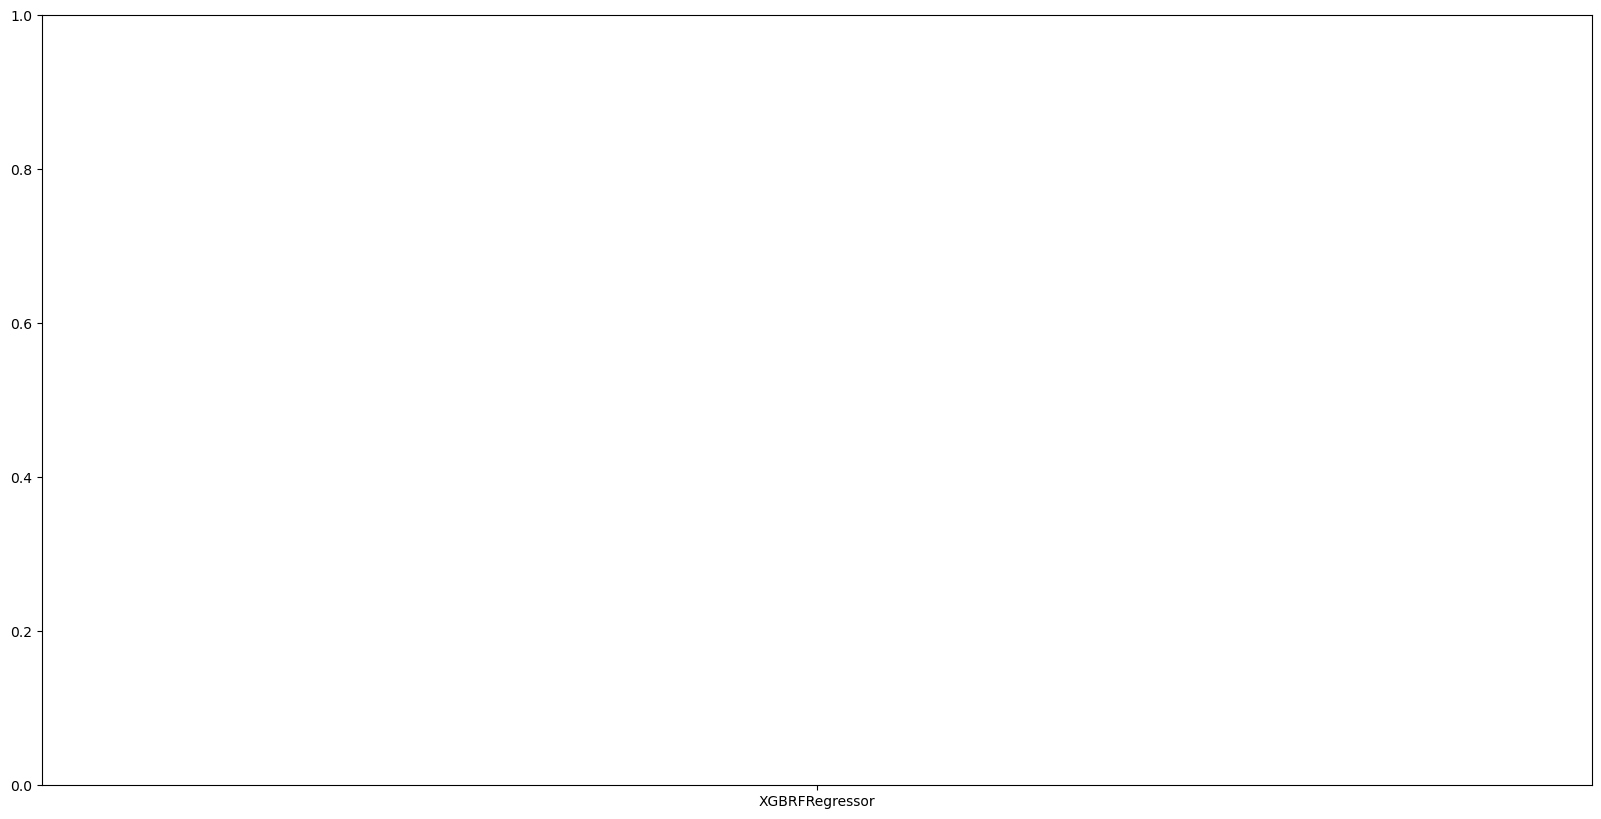

In [64]:
#plot a bar graph to compare the models
plt.figure(figsize=(20, 10))
plt.bar(preds_dict.keys(), preds_dict.values())
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error')
plt.show()


In [61]:

# scatter plot of actual vs predicted values for each model
for model_name, preds in preds_dict.items():
    fig = px.scatter(x=y_val, y=preds, title=model_name)
    fig.show()


In [ ]:

# Define the model
model_fare = XGBRFRegressor()

# Train the model
model_fare.fit(X_train, y_train)

# Predict the validation set results
y_pred_val = model_fare.predict(X_val)

In [ ]:
# Calculate the MSE
mse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"Validation MSE: {mse}")

Validation MSE: 2255.928322781458


In [ ]:
# Predict the yield in the test set
india_test['COTTON YIELD (Kg per ha)'] = model_fare.predict(india_test[features])

In [ ]:
submission_india=india_test['COTTON YIELD (Kg per ha)']

In [ ]:
submission_india

0       3316.209961
1       3277.135010
2       4634.793457
3       4183.600586
4       4314.708496
           ...     
2471      43.410686
2472       1.823915
2473       1.823915
2474       1.823915
2475       5.354764
Name: COTTON YIELD (Kg per ha), Length: 2476, dtype: float32

# Let train USA data

In [ ]:
columns = usa_train.columns

In [ ]:
columns

Index(['Year', 'State', 'Planted (1000 Acres)', 'Harvested (1000 Acres)',
       'Yield (Pounds/ Harvested Area)', 'Average Temperature Value',
       'Average Temperature Anomaly', 'Maximum Temperature Value',
       'Maximum Temperature Anomaly', 'Minimum Temperature Value',
       'Minimum Temperature Anomaly', 'Precipitation Value',
       'Precipitation Anomaly', 'Cooling Degree Days Value',
       'Cooling Degree Days Anomaly', 'Heating Degree Days Value',
       'Heating Degree Days Anomaly',
       'Palmer Drought Severity Index (PDSI) Value',
       'Palmer Drought Severity Index (PDSI) Anomaly',
       'Palmer Hydrological Drought Index (PHDI) Value',
       'Palmer Hydrological Drought Index (PHDI) Anomaly',
       'Palmer Modified Drought Index (PMDI) Value',
       'Palmer Modified Drought Index (PMDI) Anomaly', 'Palmer Z-Index Value',
       'Palmer Z-Index Anomaly'],
      dtype='object')

In [ ]:
usa_train=usa_train.fillna("0")

In [ ]:
usa_train= usa_train.astype(float, errors='ignore')

In [ ]:
usa_train.dtypes

Year                                                float64
State                                                object
Planted (1000 Acres)                                 object
Harvested (1000 Acres)                               object
Yield (Pounds/ Harvested Area)                      float64
Average Temperature Value                           float64
Average Temperature Anomaly                         float64
Maximum Temperature Value                           float64
Maximum Temperature Anomaly                         float64
Minimum Temperature Value                           float64
Minimum Temperature Anomaly                         float64
Precipitation Value                                 float64
Precipitation Anomaly                               float64
Cooling Degree Days Value                           float64
Cooling Degree Days Anomaly                         float64
Heating Degree Days Value                           float64
Heating Degree Days Anomaly             

In [ ]:
usa_train=usa_train.drop(['State','Planted (1000 Acres)',"Harvested (1000 Acres)"], axis=1)

In [ ]:
usa_train

,Year,Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,Precipitation Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975.0,406.0,66.825000,1.566667,75.066667,2.266667,54.566667,2.866667,7.230000,0.000000,...,224.916667,-1.083333,8.161667,6.840833,0.000000,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975.0,486.0,63.875000,2.225000,73.808333,1.208333,52.975000,3.258333,0.000000,4.125000,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975.0,1028.0,61.891667,-0.733333,74.483333,-0.291667,45.283333,0.850000,4.846667,3.821667,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975.0,1074.0,0.000000,-0.383333,72.700000,-0.466667,46.825000,1.691667,5.745000,2.918333,...,303.083333,0.000000,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975.0,347.0,73.208333,4.133333,83.983333,2.308333,64.408333,2.941667,8.595833,4.125000,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2002.0,560.0,60.416667,2.433333,75.133333,1.116667,50.708333,2.791667,0.000000,0.000000,...,316.333333,11.916667,4.065000,0.377500,1.434167,1.620833,1.524167,0.000000,3.279167,4.037500
556,2002.0,316.0,65.700000,1.683333,76.058333,2.625000,53.325000,2.741667,6.878333,3.880833,...,217.916667,-1.666667,0.000000,0.236667,-1.291667,-0.115833,-0.941667,-0.740000,2.412500,1.468333
557,2002.0,743.0,61.725000,1.683333,72.566667,4.408333,48.841667,4.941667,6.935000,2.385833,...,318.166667,-2.500000,3.680000,0.880833,2.127500,3.180000,2.747500,3.960000,4.494167,3.199167
558,2002.0,541.0,67.025000,2.716667,80.941667,0.333333,57.100000,3.116667,3.554167,4.202500,...,170.000000,8.750000,4.174167,1.235833,0.911667,1.660833,1.031667,2.886667,4.301667,3.251667


In [ ]:
columns=usa_train.columns

In [ ]:
columns

Index(['Year', 'Yield (Pounds/ Harvested Area)', 'Average Temperature Value',
       'Average Temperature Anomaly', 'Maximum Temperature Value',
       'Maximum Temperature Anomaly', 'Minimum Temperature Value',
       'Minimum Temperature Anomaly', 'Precipitation Value',
       'Precipitation Anomaly', 'Cooling Degree Days Value',
       'Cooling Degree Days Anomaly', 'Heating Degree Days Value',
       'Heating Degree Days Anomaly',
       'Palmer Drought Severity Index (PDSI) Value',
       'Palmer Drought Severity Index (PDSI) Anomaly',
       'Palmer Hydrological Drought Index (PHDI) Value',
       'Palmer Hydrological Drought Index (PHDI) Anomaly',
       'Palmer Modified Drought Index (PMDI) Value',
       'Palmer Modified Drought Index (PMDI) Anomaly', 'Palmer Z-Index Value',
       'Palmer Z-Index Anomaly'],
      dtype='object')

In [ ]:
columns = [col for col in columns if col not in ['Yield (Pounds/ Harvested Area)']]

In [ ]:
features = columns
target = 'Yield (Pounds/ Harvested Area)'

X = usa_train[features]
y = usa_train[target]

In [ ]:
# Split the data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the model
model_fare = XGBRFRegressor()

# Train the model
model_fare.fit(X_train, y_train)

# Predict the validation set results
y_pred_val = model_fare.predict(X_val)

In [ ]:
# Calculate the MSE
mse = np.sqrt(mean_squared_error(y_val, y_pred_val))
print(f"Validation MSE: {mse}")

Validation MSE: 190.33868579369994


In [ ]:
usa_test

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,2003,AL,525,510,0,66.733333,1.475000,75.833333,1.033333,55.633333,...,237.833333,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000
1,2003,AR,980,945,0,61.266667,3.616667,74.966667,0.366667,53.558333,...,292.083333,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500
2,2003,AZ,215,213,0,62.900000,4.275000,78.158333,4.383333,51.641667,...,155.750000,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,NaN,0.297500
3,2003,CA,550,545,0,62.425000,1.775000,74.850000,1.683333,48.991667,...,237.666667,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167
4,2003,FL,NaN,92,0,NaN,3.791667,84.208333,2.533333,61.533333,...,66.500000,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2022,OK,660,310,0,62.900000,NaN,78.133333,5.116667,48.683333,...,307.000000,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167
396,2022,SC,270,265,0,67.808333,3.791667,79.041667,2.608333,55.591667,...,209.500000,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000
397,2022,TN,335,325,0,61.516667,3.475000,70.900000,NaN,48.091667,...,NaN,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333
398,2022,TX,"7,900","2,500",0,69.516667,5.208333,83.441667,4.833333,57.550000,...,164.916667,5.666667,NaN,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833


In [ ]:
# Predict the yield in the test set
usa_test['Yield (Pounds/ Harvested Area)'] = model_fare.predict(usa_test[features])

In [ ]:
usa_test

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,2003,AL,525,510,635.014771,66.733333,1.475000,75.833333,1.033333,55.633333,...,237.833333,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000
1,2003,AR,980,945,602.666687,61.266667,3.616667,74.966667,0.366667,53.558333,...,292.083333,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500
2,2003,AZ,215,213,728.841553,62.900000,4.275000,78.158333,4.383333,51.641667,...,155.750000,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,NaN,0.297500
3,2003,CA,550,545,1086.533203,62.425000,1.775000,74.850000,1.683333,48.991667,...,237.666667,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167
4,2003,FL,NaN,92,575.734558,NaN,3.791667,84.208333,2.533333,61.533333,...,66.500000,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2022,OK,660,310,455.821625,62.900000,NaN,78.133333,5.116667,48.683333,...,307.000000,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167
396,2022,SC,270,265,616.266724,67.808333,3.791667,79.041667,2.608333,55.591667,...,209.500000,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000
397,2022,TN,335,325,482.496643,61.516667,3.475000,70.900000,NaN,48.091667,...,NaN,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333
398,2022,TX,"7,900","2,500",583.818909,69.516667,5.208333,83.441667,4.833333,57.550000,...,164.916667,5.666667,NaN,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833


In [ ]:
submission_usa=usa_test['Yield (Pounds/ Harvested Area)']

In [ ]:
submission_usa

0       635.014771
1       602.666687
2       728.841553
3      1086.533203
4       575.734558
          ...     
395     455.821625
396     616.266724
397     482.496643
398     583.818909
399     474.961670
Name: Yield (Pounds/ Harvested Area), Length: 400, dtype: float32

In [ ]:
commodity

,Year,Cotton_Price[Dollar/ton]
0,1975,1055.792518
1,1976,1582.035312
2,1977,1399.933700
3,1978,1350.109288
4,1979,1428.152836
5,1980,1869.517760
6,1981,1697.116476
7,1982,1446.892106
8,1983,1655.008234
9,1984,1604.963360


### We need to find relation and fill the data from year 2003 to 2022 with the USA data

In [ ]:
# Convert the 'Year' column to numeric type if it's not already
commodity['Year'] = pd.to_numeric(commodity['Year'])

# Select the rows between the years 2003 and 2022
submission_commodity = commodity[(commodity['Year'] >= 2003) & (commodity['Year'] <= 2022)]


In [ ]:
submission_commodity=submission_commodity["Cotton_Price[Dollar/ton]"]

### To create the final submission file

In [ ]:
submission = pd.concat([submission_india,submission_usa,submission_commodity],axis=1)

In [ ]:
submission

,COTTON YIELD (Kg per ha),Yield (Pounds/ Harvested Area),Cotton_Price[Dollar/ton]
0,3316.209961,635.014771,NaN
1,3277.135010,602.666687,NaN
2,4634.793457,728.841553,NaN
3,4183.600586,1086.533203,NaN
4,4314.708496,575.734558,NaN
...,...,...,...
2471,43.410686,NaN,NaN
2472,1.823915,NaN,NaN
2473,1.823915,NaN,NaN
2474,1.823915,NaN,NaN


In [ ]:
submission = submission.fillna(0)

In [ ]:
submission

,COTTON YIELD (Kg per ha),Yield (Pounds/ Harvested Area),Cotton_Price[Dollar/ton]
0,3316.209961,635.014771,0.0
1,3277.135010,602.666687,0.0
2,4634.793457,728.841553,0.0
3,4183.600586,1086.533203,0.0
4,4314.708496,575.734558,0.0
...,...,...,...
2471,43.410686,0.000000,0.0
2472,1.823915,0.000000,0.0
2473,1.823915,0.000000,0.0
2474,1.823915,0.000000,0.0


In [ ]:
submission.to_csv("submission.csv",index=False)